# **Evaluation GPA sensitivity and accuracy**

**Simple tests to verify the proper behaviour of GPA**

## **Parameters designation**

- **lenght** : number of pixel for the 1D discretization (integer>1)
- **freq** : periodicity in pixel of the sine function (float>0) ==> g = 1/freq
- **center** : position in pixel of the center of the Gaussian mask in Fourier space (integer)
- **sigma** : radius in pixel of the Gaussian mask in Fourier space (float>0)
- **strain** : change of periodicity in pixel of the sine function (float) ==> g + $\Delta$g = 1 / (freq + strain)
- **noise** : standard deviation of the Gaussian noise (float)

In [1]:
import gpa as gpa
import datastruct as datastruct
import process as process

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import norm

In [2]:
%matplotlib notebook

## **Test #1 - No deformation, no noise**

In [3]:
length = 1023
freq = 4.0
center = 768 # Mask centered on the sine frequency in Fourier space
sigma = 10
strain = 0
noise = 0

data_1 = datastruct.GPAData()
data_1.sine = process.sine_1d(length, freq, strain , noise)
data_1.mask = process.mask_gaussian_1d(data_1.sine, center, sigma)
data_1.gpa = gpa.gpa(data_1.sine, data_1.mask)
data_1.strain = process.strain_1d(data_1.gpa, freq)
data_1.error_gpa = process.error_gpa_1d(data_1.gpa, freq, strain)

<IPython.core.display.Javascript object>


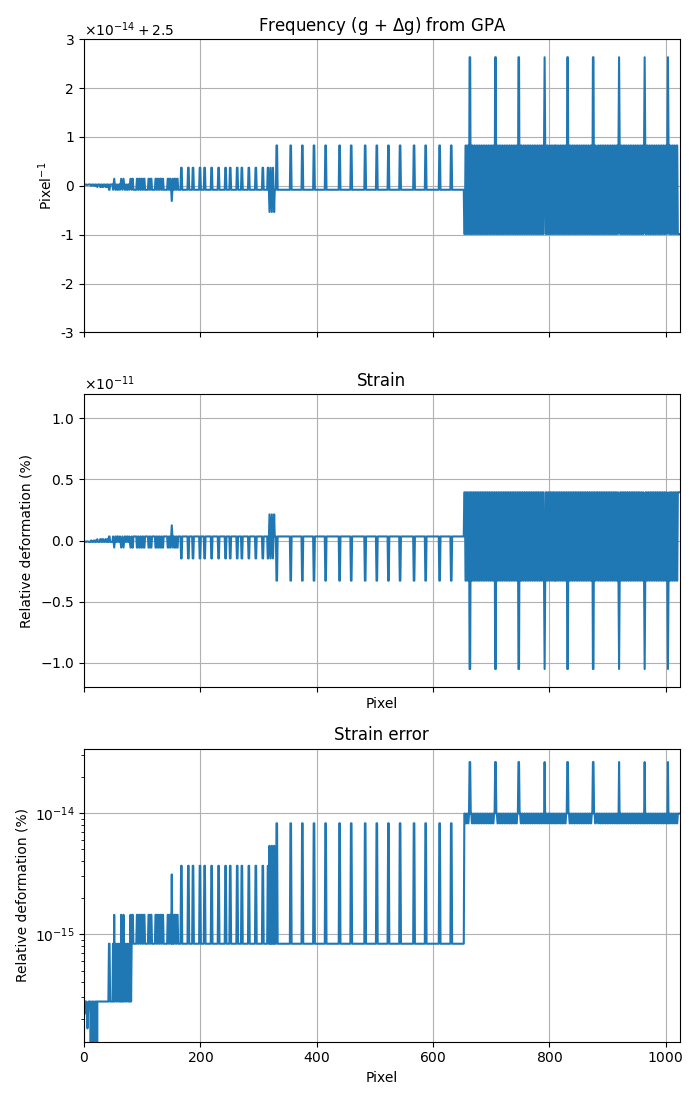

In [4]:
fig1, ax1 = plt.subplots(3, 1,figsize=(7, 11), sharex=True)
ax1[0].plot(data_1.gpa)
ax1[1].plot(100 * data_1.strain)
ax1[2].plot(data_1.error_gpa)

offset = 2.5E-1
yticks = [offset-3E-14, offset-2E-14, offset-1E-14, offset, offset+1E-14, offset+2E-14, offset+3E-14]
yticks_label = [str(i) for i in range(-3, 4)]

ax1[0].set_yticks(yticks)
ax1[0].set_yticklabels(yticks_label)
offset_label =r'$\times 10^{-14} +2.5 $' 
ax1[0].text(x = 0.0, y = 1.01, s = offset_label, transform=ax1[0].transAxes)
ax1[0].set_title('Frequency (g +'+ r' $\Delta$'+'g) from GPA')
ax1[0].set_ylabel('Pixel' + '$^{-1}$')
ax1[0].grid(visible=True)

ax1[1].set_xlim(0, 1024)
ax1[1].set_ylim(-1.2E-11, 1.2E-11)
ax1[1].ticklabel_format(useMathText=True)
ax1[1].set_title('Strain')
ax1[1].set_xlabel('Pixel')
ax1[1].set_ylabel('Relative deformation (%)')
ax1[1].grid(visible=True)

ax1[2].set_xlim(0, 1024)
#ax1[2].set_ylim(-0.2E-14, 3E-14)
ax1[2].ticklabel_format(useMathText=True)
ax1[2].set_title('Strain error')
ax1[2].set_xlabel('Pixel')
ax1[2].set_ylabel('Relative deformation (%)')
ax1[2].grid(visible=True)
ax1[2].set_yscale('log')

fig1.tight_layout()

plt.show()

## **Test #2 - Different deformation, no noise, same mask**

In [5]:
length = 1023
freq = 4.0
center = 768
sigma = 10
strain = [0.00001 * freq, 0.0001 * freq, 0.001 * freq, 0.01 * freq] # Different level of deformation as a fraction of freq
noise = 0

data_2 = []
label_2_strain = ['0.001%', '0.01%', '0.1%', '1%']

for deformation in strain:
    data = datastruct.GPAData()
    data.sine = process.sine_1d(length, freq, deformation , noise)
    data.mask = process.mask_gaussian_1d(data.sine, center, sigma)
    data.gpa = gpa.gpa(data.sine, data.mask)
    data.strain = process.strain_1d(data.gpa, freq)
    data.error_gpa = process.error_gpa_1d(data.gpa, freq, deformation)
    data_2.append(data)

<IPython.core.display.Javascript object>


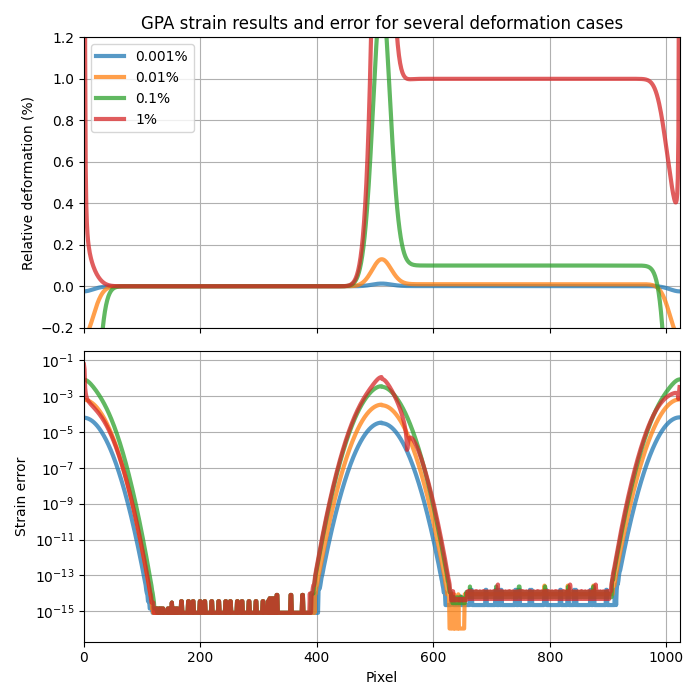

In [6]:
fig2, ax2 = plt.subplots(2, 1,figsize=(7, 7), sharex=True)
for i, data in enumerate(data_2):
    ax2[0].plot(100 * data.strain, linewidth=3, label=label_2_strain[i], alpha=0.75)
    ax2[1].plot(data.error_gpa, linewidth=3, label=label_2_strain[i], alpha=0.75)
    
ax2[0].set_title('GPA strain results and error for several deformation cases')
ax2[0].set_ylim(-0.2, 1.2) 
ax2[0].set_ylabel('Relative deformation (%)')
ax2[0].grid(visible=True)
ax2[0].legend()

ax2[1].set_xlim(0, 1024)
ax2[1].set_yscale('log')
ax2[1].set_ylabel('Strain error')
ax2[1].set_xlabel('Pixel')
ax2[1].grid(visible=True)

fig2.tight_layout()

plt.show()

## **Test #3 - Same deformation, no noise and different mask**

In [7]:
length = 1023
freq = 4.0
center = 768
sigma = [3, 6, 10, 20, 40] # Different mask radius
strain = 0.01 * freq
noise = 0

data_3 = []
label_3_sigma = ['3 px', '6 px', '10 px', '20 px', '40 px']

for mask_radius in sigma:
    data = datastruct.GPAData()
    data.sine = process.sine_1d(length, freq, strain , noise)
    data.mask = process.mask_gaussian_1d(data.sine, center, mask_radius)
    data.gpa = gpa.gpa(data.sine, data.mask)
    data.strain = process.strain_1d(data.gpa, freq)
    data.error_gpa = process.error_gpa_1d(data.gpa, freq, strain)
    data_3.append(data)

<IPython.core.display.Javascript object>


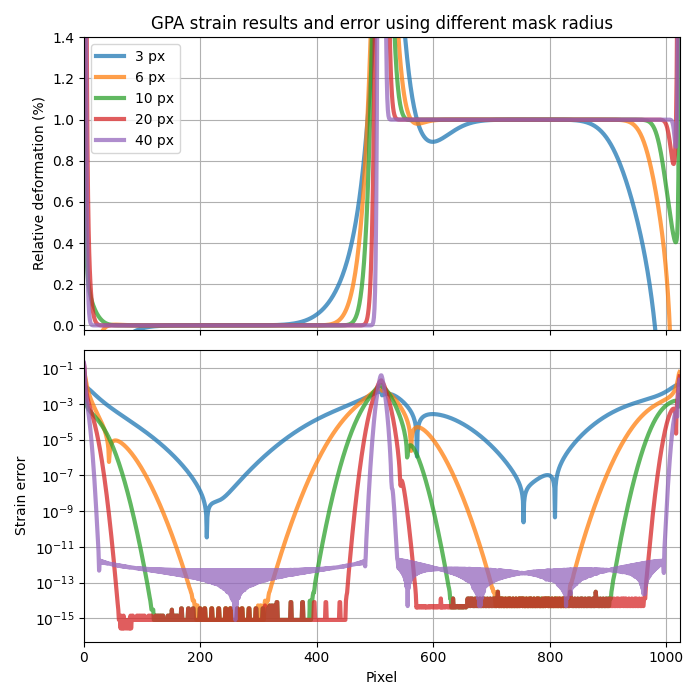

In [8]:
fig3, ax3 = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
for i, data in enumerate(data_3):
    ax3[0].plot(100 * data.strain, linewidth=3, label=label_3_sigma[i], alpha=0.75)
    ax3[1].plot(data.error_gpa, linewidth=3, label=label_3_sigma[i], alpha=0.75)

ax3[0].set_title('GPA strain results and error using different mask radius')
ax3[0].set_ylim(-0.02, 1.4) 
ax3[0].set_ylabel('Relative deformation (%)')
ax3[0].grid(visible=True)
ax3[0].legend()

ax3[1].set_xlim(0, 1024)
ax3[1].set_yscale('log')
ax3[1].set_ylabel('Strain error')
ax3[1].set_xlabel('Pixel')
ax3[1].grid(visible=True)

fig3.tight_layout()

## **Test #4 - Same deformation, different noise and same mask**

In [9]:
length = 1023
freq = 4.0
center = 768
sigma = 10
strain = 0.0001 * freq
noise = [0,
         0.00001 * freq,
         0.0001 * freq,
         0.001 * freq,
         0.01 * freq] # Different phase noise level

data_4 = []
label_4_noise = ['Noise - 0%','Noise - 0.001%', 'Noise - 0.01%', 'Noise - 0.1%', 'Noise - 1%']

for level in noise:
    data = datastruct.GPAData()
    data.sine = process.sine_1d(length, freq, strain , level)
    data.mask = process.mask_gaussian_1d(data.sine, center, sigma)
    data.gpa = gpa.gpa(data.sine, data.mask)
    data.strain = process.strain_1d(data.gpa, freq)
    data.error_gpa = process.error_gpa_1d(data.gpa, freq, strain)
    data_4.append(data)

<IPython.core.display.Javascript object>


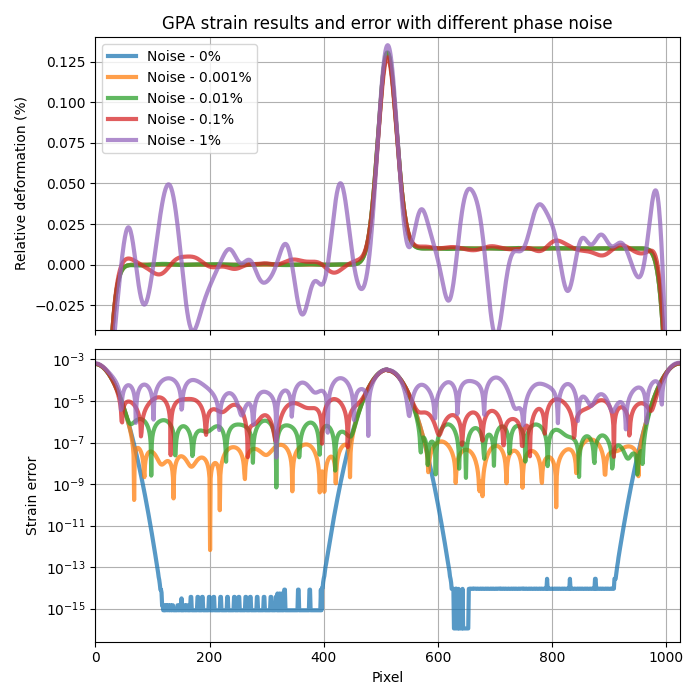

In [10]:
fig4, ax4 = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
for i, data in enumerate(data_4):
    ax4[0].plot(100 * data.strain, linewidth=3, label=label_4_noise[i], alpha=0.75)
    ax4[1].plot(data.error_gpa, linewidth=3, label=label_4_noise[i], alpha=0.75)

ax4[0].set_title('GPA strain results and error with different phase noise')
ax4[0].set_ylim(-0.04, 0.14) 
ax4[0].set_ylabel('Relative deformation (%)')
ax4[0].grid(visible=True)
ax4[0].legend(loc=2)

ax4[1].set_xlim(0, 1024)
ax4[1].set_yscale('log')
ax4[1].set_ylabel('Strain error')
ax4[1].set_xlabel('Pixel')
ax4[1].grid(visible=True)

fig4.tight_layout()

In [11]:
fig1.savefig("results/Fig_1_zero_deformation.png", dpi=300)
fig2.savefig("results/Fig_2_four_deformation_cases.png", dpi=300)
fig3.savefig("results/Fig_3_four_mask_radius.png", dpi=300)
fig4.savefig("results/Fig_4_four_noise_phases.png", dpi=300)